In [1]:
#bland-altman plot

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random
%matplotlib inline
plt.style.use('ggplot')

In [3]:
def plotblandaltman(x,y,title,sd_limit):
    plt.figure(figsize=(20,8))
    plt.suptitle(title, fontsize="20")
    if len(x) != len(y):
        raise ValueError('x does not have the same length as y')
    else:
        for i in range(len(x)):
            a = np.asarray(x)

            b = np.asarray(x)+np.asarray(y)
            mean_diff = np.mean(b)
            std_diff = np.std(b, axis=0)
            limit_of_agreement = sd_limit * std_diff
            lower = mean_diff - limit_of_agreement
            upper = mean_diff + limit_of_agreement

            difference = upper - lower
            lowerplot = lower - (difference * 0.5)
            upperplot = upper + (difference * 0.5)
            plt.axhline(y=mean_diff, linestyle = "--", color = "red", label="mean diff")

            plt.axhline(y=lower, linestyle = "--", color = "grey", label="-1.96 SD")
            plt.axhline(y=upper, linestyle = "--", color = "grey", label="1.96 SD")

            plt.text(a.max()*0.85, upper * 1.1, " 1.96 SD", color = "grey", fontsize = "14")
            plt.text(a.max()*0.85, lower * 0.9, "-1.96 SD", color = "grey", fontsize = "14")
            plt.text(a.max()*0.85, mean_diff * 0.85, "Mean", color = "red", fontsize = "14")
            plt.ylim(lowerplot, upperplot)
            plt.scatter(x=a,y=b)

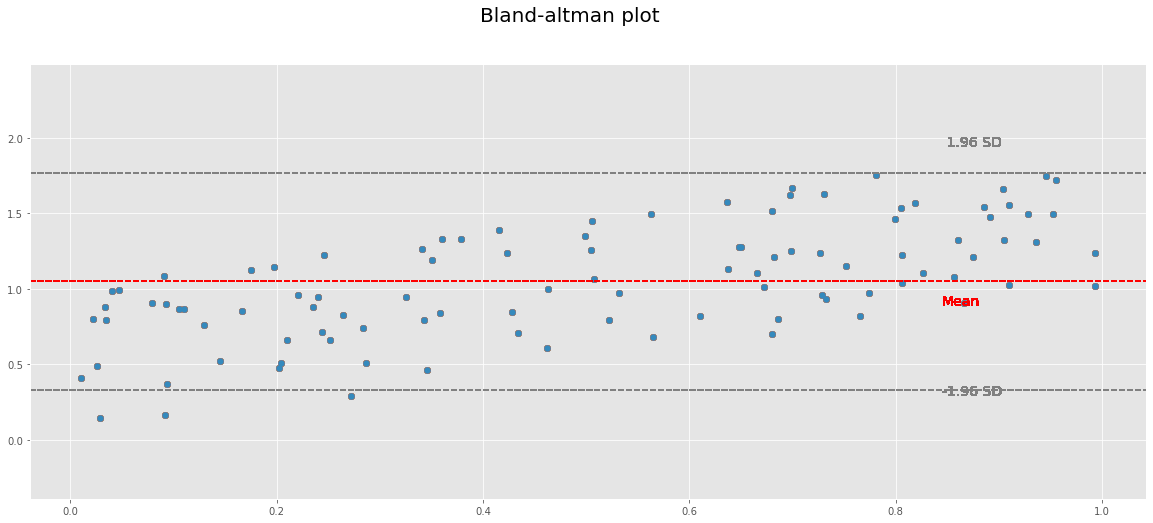

In [4]:
x = np.random.rand(100)
y = np.random.rand(100)
plotblandaltman(x,y,"Bland-altman plot",1.96)